# Continuous systems 1DoF

In [2]:
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
from ldds.vector_fields import HamCenter1D, HamSaddle1D, Duffing1D

## Autonomous

### Hamilton Centre

_Energy_

\begin{equation*}
H(x, p_x) = \frac{\omega}{2} (p_x^2 + x^2) \;, \;\; \omega > 0
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = \omega p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = -\omega x
 \end{align*}

In [3]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

# Mesh parameters
x_min,x_max = [-1.6, 1.6]
y_min,y_max = [-1.6, 1.6]
Nx, Ny = [300, 300]

In [4]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
vector_field = HamCenter1D

In [5]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

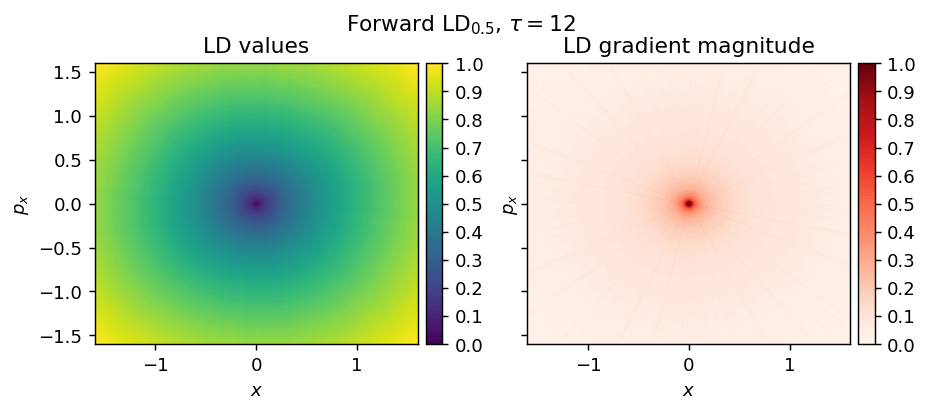

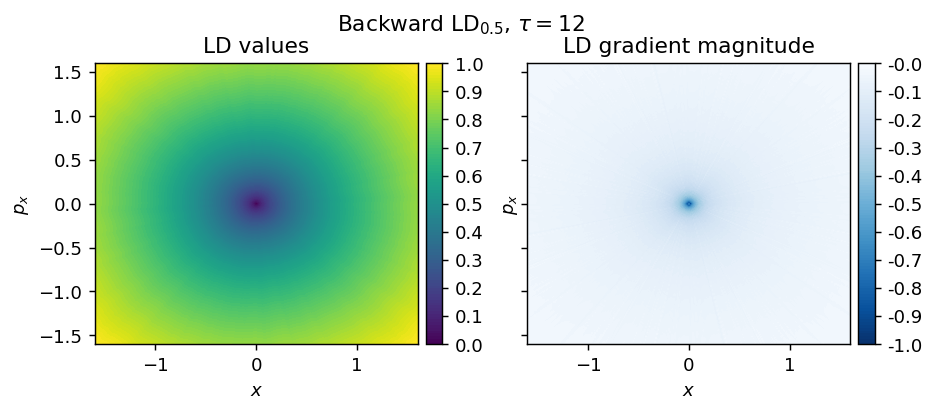

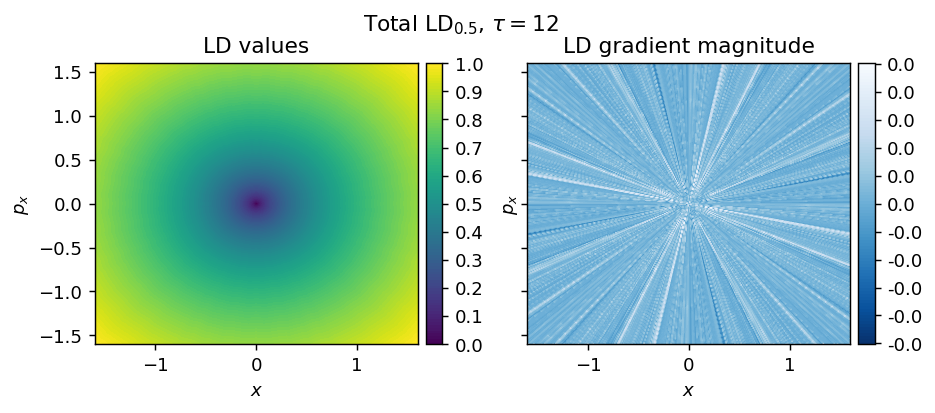

In [6]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Hamilton Saddle

_Energy_

\begin{equation*}
H(x, p_x) = \frac{\lambda}{2}( p_x^2 -  x^2 ) \; , \;\; \lambda > 0
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = \lambda p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = \lambda x
 \end{align*}

In [7]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

# Mesh parameters
x_min,x_max = [-1.6, 1.6]
y_min,y_max = [-1.6, 1.6]
Nx, Ny = [300, 300]

In [8]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
vector_field = HamSaddle1D

In [9]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

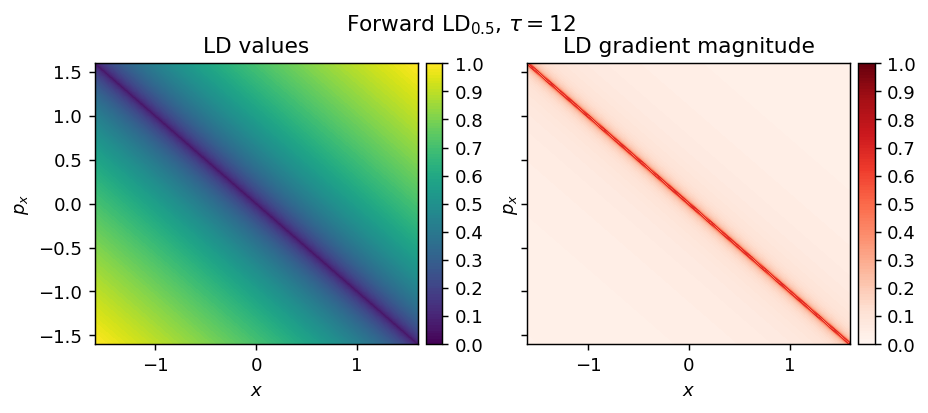

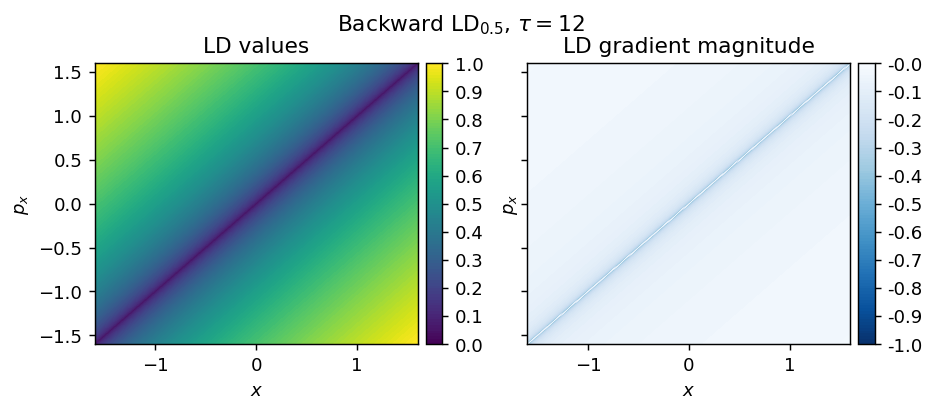

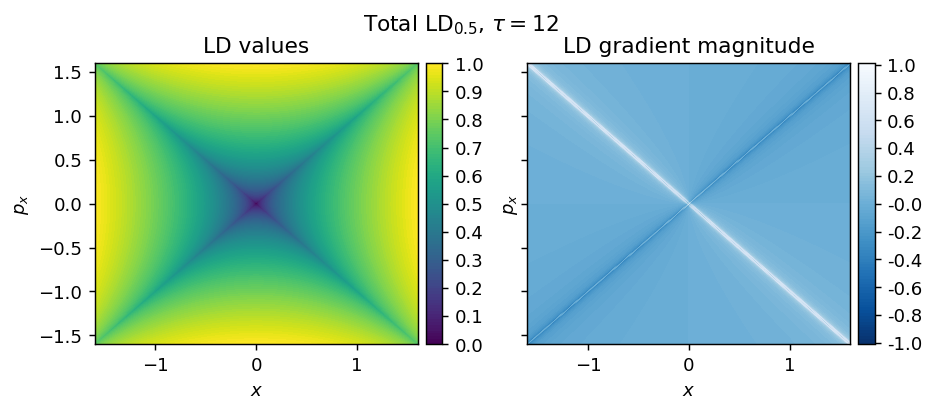

In [10]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Duffing oscillator

_Energy_

\begin{equation*}
H(x, p_x) = \dfrac{1}{2}p_x^2 - \dfrac{1}{2}x^2 + \dfrac{1}{4}x^4
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = x - x^3
 \end{align*}

In [11]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

# Mesh parameters
x_min,x_max = [-1.6, 1.6]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [12]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
vector_field = Duffing1D

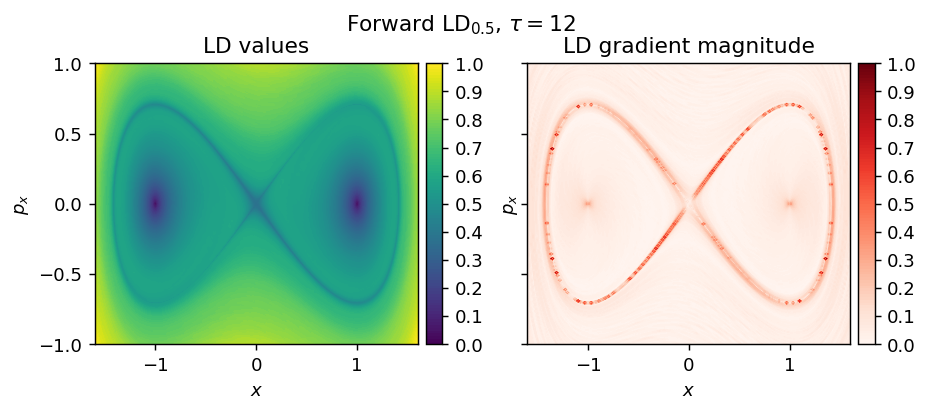

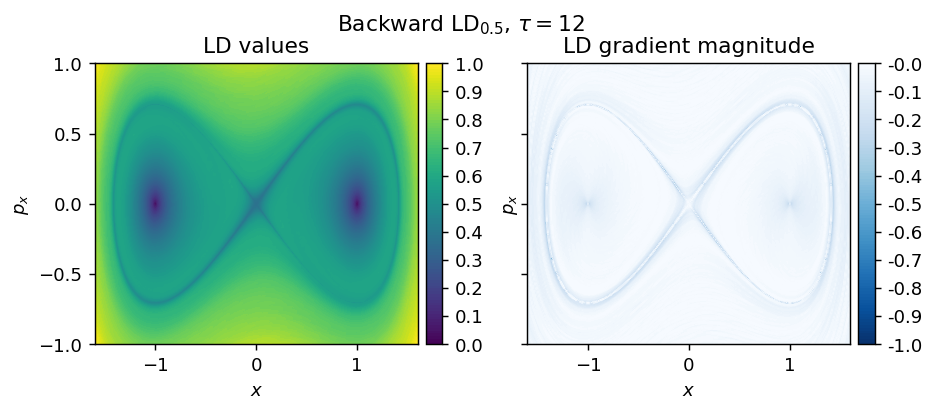

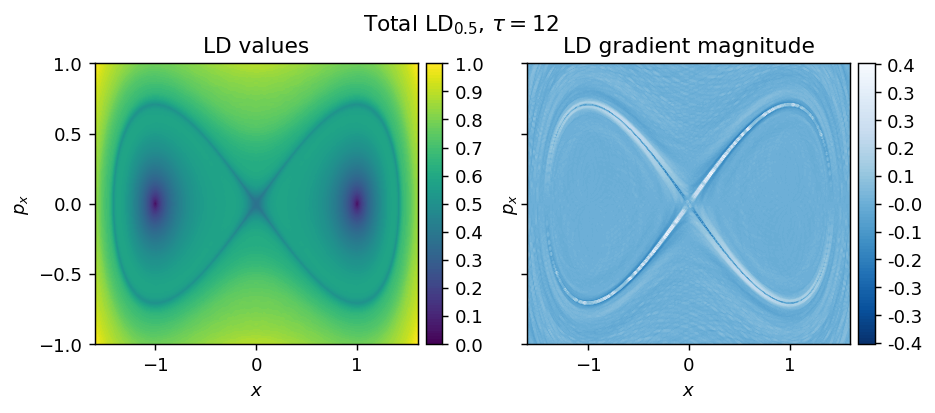

In [13]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

## Non-autonomous

In [14]:
from ldds.vector_fields import DoubleGyre

### Double-gyre

In [15]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [300, 300]

In [16]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [17]:
vector_field = DoubleGyre

In [18]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

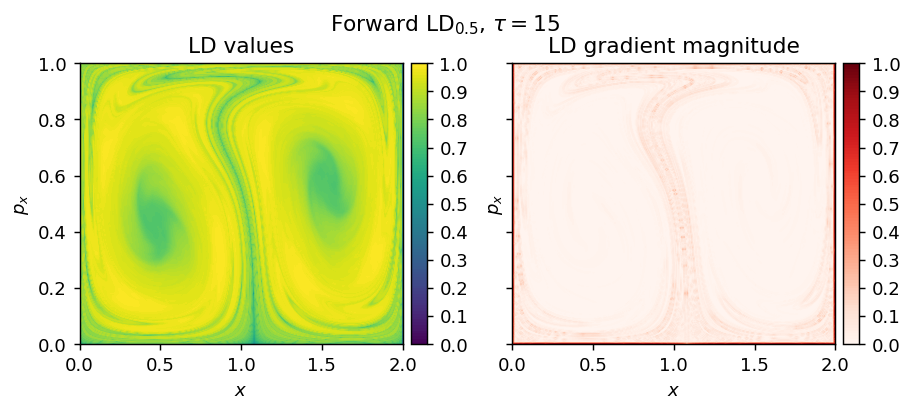

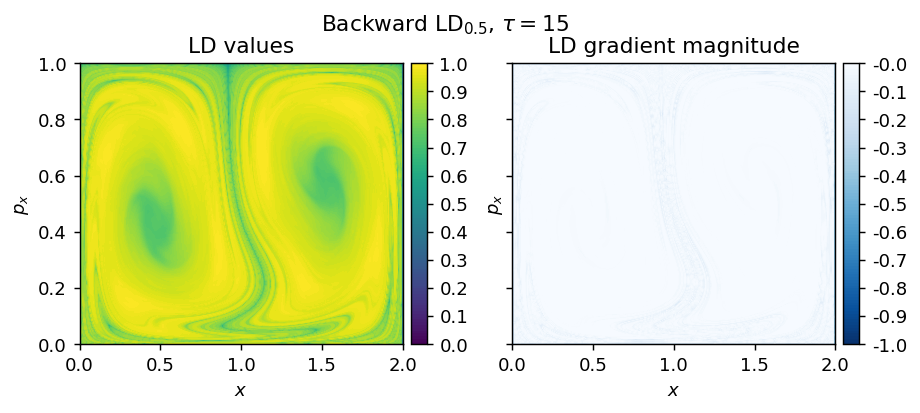

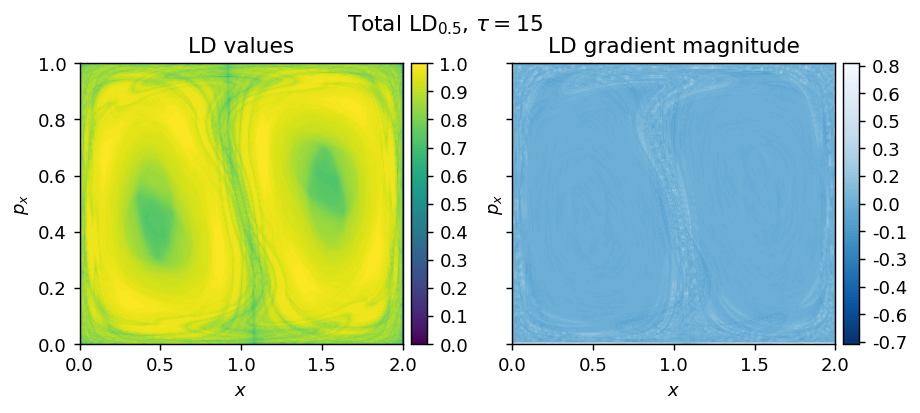

In [19]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)